## Model validation with synthetically generated data - Pop2

In [1]:
import os
import csv
import random
import numpy as np
import ipyvolume as ipv
%matplotlib inline

In [2]:
'''
Usage: To read a file with x,y,z coordinates, and store the data for each dimension in a separate array.
params: filename - File with x,y,z cooridnates
returns: 3 arrays with x's, y's and z's
'''
def getPoints(filename):
    x = list(); y = list(); z = list()
    with open (filename, 'r') as csv_file:
        csv_reader = csv.reader (csv_file)
        for line in csv_reader:
            x.append(line[0]); y.append(line[1]); z.append(line[2])
    x = np.array(x, dtype = float)
    y = np.array(y, dtype = float)
    z = np.array(z, dtype = float)
    return (x, y, z)    

'''
Usage: To read a file with x,y,z coordinates, and store the data for each dimension in a separate array.
params: filename - File with x,y,z cooridnates
returns: 3 arrays with x's, y's and z's
'''
def getParams(filename):
    r2 = list(); pi2 = list(); ph2 = list(); rse2 = list(); pise2 = list(); phse2 = list()
    r3 = list(); pi3 = list(); ph3 = list(); rse3 = list(); pise3 = list(); phse3 = list()
    with open (filename, 'r') as csv_file:
        csv_reader = csv.reader (csv_file)
        for line in csv_reader:
            r2.append(line[0]); pi2.append(line[1]); ph2.append(line[2])
            rse2.append(line[3]); pise2.append(line[4]); phse2.append(line[5])
            r3.append(line[6]); pi3.append(line[7]); ph3.append(line[8])
            rse3.append(line[9]); pise3.append(line[10]); phse3.append(line[11])
    r2 = np.array(r2, dtype = float)
    pi2 = np.array(pi2, dtype = float)
    ph2 = np.array(ph2, dtype = float)
    rse2 = np.array(rse2, dtype = float)
    pise2 = np.array(pise2, dtype = float)
    phse2 = np.array(phse2, dtype = float)
    r3 = np.array(r3, dtype = float)
    pi3 = np.array(pi3, dtype = float)
    ph3 = np.array(ph3, dtype = float)
    rse3 = np.array(rse3, dtype = float)
    pise3 = np.array(pise3, dtype = float)
    phse3 = np.array(phse3, dtype = float)
    return (r2, pi2, ph2, rse2, pise2, phse2, r3, pi3, ph3, rse3, pise3, phse3)

In [8]:
#Set model
numPoints = 1000 #population size
radius = 3
pitch = 14
p_error = 10 #of radius 
numBoot = 50 #number of bootstraps to perform 
numSamples = 200 #number of samples to pick for each run of curve fitting 

In [9]:
#SYNTHETIC MODEL
#Generate a perfect helix with the z axis as the long axis.
#Read this for math background: (http://mathworld.wolfram.com/Helix.html)
t = np.linspace(0, 8*np.pi, numPoints) #controls number of helical turns 
x = (t*radius)*np.cos(t)
y = (t*radius)*np.sin(t) 
z = (pitch/(2*np.pi))*t 

#Vizualization - Fig1 - a perfect helix
fig = ipv.figure()
ipv.style.use('dark')
scatter = ipv.scatter(x,y,z, marker = 'sphere', color = 'blue', size = 5)
ipv.show()

In [10]:
#Sampling points randomly from a normal distribution centered at 0.
posErrorx = np.random.normal(0, (p_error/100)*radius, numPoints)
posErrory = np.random.normal(0, (p_error/100)*radius, numPoints)
posErrorz = np.random.normal(0, (p_error/100)*pitch , numPoints)

#Adding random positional error to the 1000 points on the helix.
xWithErr = x + posErrorx
yWithErr = y + posErrory
zWithErr = z + posErrorz

#Vizualization - Fig1 - helix with positional error
fig = ipv.figure()
ipv.style.use('dark')
scatter = ipv.scatter(xWithErr,yWithErr,zWithErr, marker = 'sphere', color = 'blue', size = 5)
ipv.show()

In [24]:
#BOOTSTRAPPING
#Read this article for background: https://machinelearningmastery.com/a-gentle-introduction-to-the-bootstrap-method/

from sklearn.utils import resample
data = list(zip(xWithErr, yWithErr, zWithErr))
#Delete params output file before next run
if os.path.exists("params.csv"): os.remove('params.csv')
for i in range(0,numBoot): #Number of times you want to bootstrap CHANGE: to 1000 times, has been set to 1 for testing
    boot = resample(data, replace = True, n_samples = numSamples)
    #Split chosen coordinates into separate lists for curve fitting/viz
    xBoot, yBoot, zBoot = zip(*boot)
    #Write coordinates to a file
    np.savetxt("input.csv", np.column_stack((np.array(xBoot, dtype=float), np.array(yBoot, dtype=float), np.array(zBoot, dtype=float))), delimiter=",", fmt='%s')
    #Create 2D projections 
    %run Project2D.py
    #curve fit 
    %run CurveFit.py

<Figure size 432x288 with 0 Axes>

In [25]:
#Plot params
y = list(range(1,numBoot+1))
r2,pi2,ph2,rse2,pise2,phse2,r3,pi3,ph3,rse3,pise3,phse3 = getParams("params.csv")

Text(0.5,1,'Radius se c1c3')

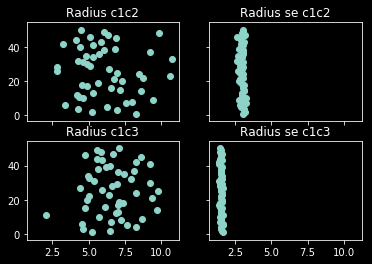

In [26]:
import matplotlib.pyplot as plt
#plt.scatter(r2, y, c='b',s=100); plt.title('Radius'); plt.xlim(2, 8); plt.show(); plt.close()
#plt.scatter(rse2, y, c='g',s=100); plt.title('Radius standard error'); plt.show(); plt.close()

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True)
plt.style.use('dark_background')
axs[0, 0].scatter(r2, y)
axs[0, 0].set_title('Radius c1c2')
axs[0, 1].scatter(rse2, y)
axs[0, 1].set_title('Radius se c1c2')
axs[1, 0].scatter(r3, y)
axs[1, 0].set_title('Radius c1c3')
axs[1, 1].scatter(rse3, y)
axs[1, 1].set_title('Radius se c1c3')

# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axs.flat:
#    ax.label_outer()

Text(0.5,1,'Pitch se c1c3')

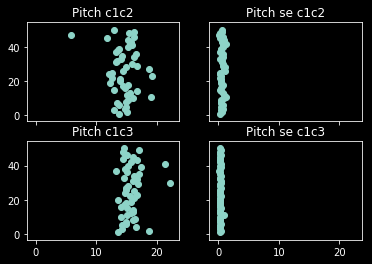

In [27]:
#plt.scatter(pi, y, c='b',s=100); plt.title('Pitch'); plt.xlim(11, 17); plt.show(); plt.close()
#plt.scatter(pise, y, c='g',s=100); plt.title('Pitch standard error'); plt.show(); plt.close()

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True)
plt.style.use('dark_background')
axs[0, 0].scatter(pi2, y)
axs[0, 0].set_title('Pitch c1c2')
axs[0, 1].scatter(pise2, y)
axs[0, 1].set_title('Pitch se c1c2')
axs[1, 0].scatter(pi3, y)
axs[1, 0].set_title('Pitch c1c3')
axs[1, 1].scatter(pise3, y)
axs[1, 1].set_title('Pitch se c1c3')

# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axs.flat:
#    ax.label_outer()

In [49]:
xo, yo, zo = getPoints("outlierFit.csv");
#Vizualization - Fig3 - outlier
fig = ipv.figure()
ipv.style.use('dark')
scatter = ipv.scatter(xo,yo,zo, marker = 'sphere', color = 'blue', size = 5)
ipv.show()

In [30]:
import statistics
#Removing outliers based on standard error in the radius
rse = (rse2 + rse3)/2
rse_mean = statistics.mean(rse)
rse_sd = statistics.stdev(rse)
print("Mean standard error in the radius:", rse_mean)
print("Std Dev of standard error in the radius:", rse_sd)
threshold = rse_mean + 2*(rse_sd)
print("threshold: ",threshold)
#Detecting positions of outliers
pos_outliers = [r for r in range(len(rse)) if rse[r] > threshold]
print(pos_outliers)
print("Percent outliers: ",(len(pos_outliers)/numBoot)*100)
for i in sorted(pos_outliers, reverse=True): #removing in reverse order
    r2 = np.delete(r2, i);pi2 = np.delete(pi2, i);ph2 = np.delete(ph2, i)
    rse2 = np.delete(rse2, i);pise2 = np.delete(pise2, i);phse2 = np.delete(phse2, i)
    r3 = np.delete(r3, i);pi3 = np.delete(pi3, i);ph3 = np.delete(ph3, i)
    rse3 = np.delete(rse3, i);pise3 = np.delete(pise3, i);phse3 = np.delete(phse3, i) 

Mean standard error in the radius: 2.2555819494723055
Std Dev of standard error in the radius: 0.0769436597342937
threshold:  2.4094692689408927
[]
Percent outliers:  0.0


Text(0.5,1,'Radius se c1c3')

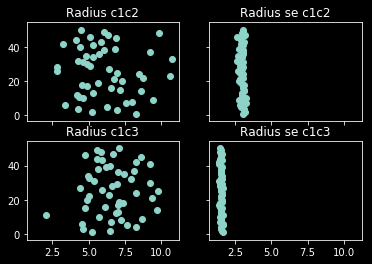

In [31]:
#Re-plotting w/o outliers 
y = list(range(1,len(r2) + 1))
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True)
plt.style.use('dark_background')
axs[0, 0].scatter(r2, y)
axs[0, 0].set_title('Radius c1c2')
axs[0, 1].scatter(rse2, y)
axs[0, 1].set_title('Radius se c1c2')
axs[1, 0].scatter(r3, y)
axs[1, 0].set_title('Radius c1c3')
axs[1, 1].scatter(rse3, y)
axs[1, 1].set_title('Radius se c1c3')

Text(0.5,1,'Pitch se c1c3')

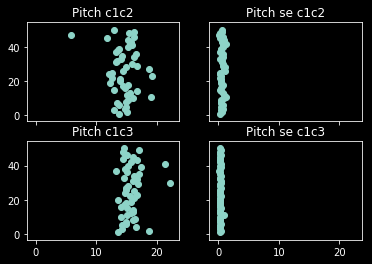

In [32]:
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True)
plt.style.use('dark_background')
axs[0, 0].scatter(pi2, y)
axs[0, 0].set_title('Pitch c1c2')
axs[0, 1].scatter(pise2, y)
axs[0, 1].set_title('Pitch se c1c2')
axs[1, 0].scatter(pi3, y)
axs[1, 0].set_title('Pitch c1c3')
axs[1, 1].scatter(pise3, y)
axs[1, 1].set_title('Pitch se c1c3')

In [33]:
#fig, axs = plt.subplots(2, 2, sharex=True, sharey=True)
#plt.style.use('dark_background')
#axs[0, 0].scatter(ph2, y)
#axs[0, 0].set_title('Phase c1c2')
#axs[0, 1].scatter(phse2, y)
#axs[0, 1].set_title('Phase se c1c2')
#axs[1, 0].scatter(ph3, y)
#axs[1, 0].set_title('Phase c1c3')
#axs[1, 1].scatter(phse3, y)
#axs[1, 1].set_title('Phase se c1c3')

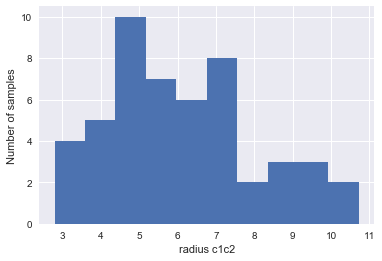

In [34]:
#Histogram
#Trying seaborn for better plots
import seaborn as sns 
sns.set()
_=plt.hist(r2, bins = 10)
_=plt.xlabel("radius c1c2")
_=plt.ylabel("Number of samples")
plt.show()

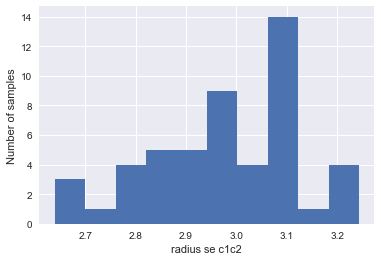

In [35]:
_=plt.hist(rse2, bins = 10)
_=plt.xlabel("radius se c1c2")
_=plt.ylabel("Number of samples")
plt.show()

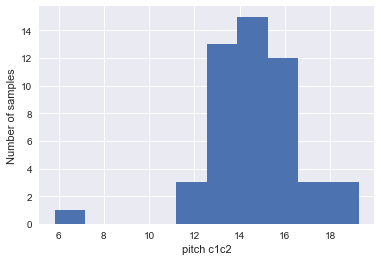

In [36]:
_=plt.hist(pi2, bins = 10)
_=plt.xlabel("pitch c1c2")
_=plt.ylabel("Number of samples")
plt.show()

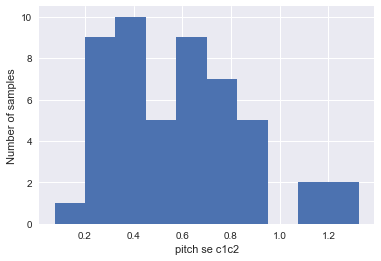

In [37]:
_=plt.hist(pise2, bins = 10)
_=plt.xlabel("pitch se c1c2")
_=plt.ylabel("Number of samples")
plt.show()

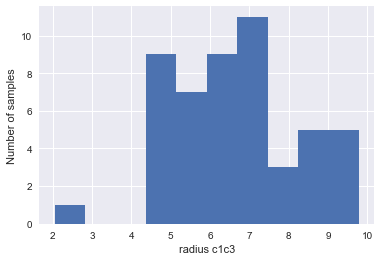

In [38]:
_=plt.hist(r3, bins = 10)
_=plt.xlabel("radius c1c3")
_=plt.ylabel("Number of samples")
plt.show()

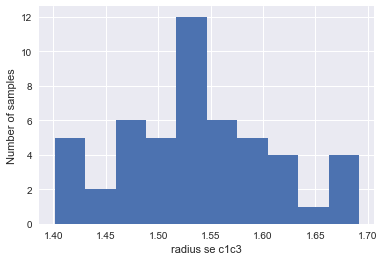

In [39]:
_=plt.hist(rse3, bins = 10)
_=plt.xlabel("radius se c1c3")
_=plt.ylabel("Number of samples")
plt.show()

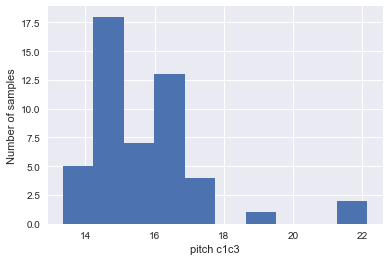

In [40]:
_=plt.hist(pi3, bins = 10)
_=plt.xlabel("pitch c1c3")
_=plt.ylabel("Number of samples")
plt.show()

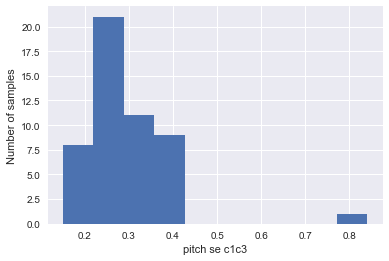

In [41]:
_=plt.hist(pise3, bins = 10)
_=plt.xlabel("pitch se c1c3")
_=plt.ylabel("Number of samples")
plt.show()

## Estimating the 95% confidence interval
(95% of all sample radii/pitch are in the 95% confidence interval)
- We are estimating a margin of error for the sample parameters, radius and pitch, from their sampling distributions. 
- We can do this by estimating the 95% confidence intervals of the sampling distributions. 
- We can use the Student's T-distribution. Note that there is a T-distribution for every sample size.
- For our current setup, the degrees of freedom (df) is 199 (sample size - 1).
- From the T-distribution table (column - 0.025 (one tail) 0.05 (two tails)), t for df = 199 is 1.96. Note that this is the same as z from the Z-distribution because the sample size is large.

How to interpret the 95% confidence interval? - It is the probability that the sample statistic of sample size n is within a certain distance of the true population. 

### Things to keep in mind:
- The confidence interval IS NOT the probability that the population mean lies within the interval. 

Upper boundary 9.942896760414497


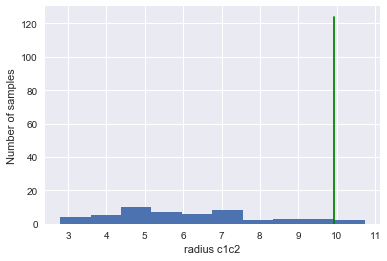

In [42]:
mean_r2 = statistics.mean(r2) #Mean of sampling distribution 
sd_r2 = statistics.stdev(r2)#Standard error in the mean/sd of sampling distribution
upper_boundary_r2 = mean_r2 + (1.96*sd_r2)
lower_boundary_r2 = mean_r2 - (1.96*sd_r2)
_=plt.hist(r2, bins = 10)
_=plt.xlabel("radius c1c2")
_=plt.ylabel("Number of samples")
print("Upper boundary",upper_boundary_r2)
#print("Lower boundary",lower_boundary_r2)
x_upper = [upper_boundary_r2]*125
#x_lower = [lower_boundary_r2]*125
y = list(range(0, 125))
plt.plot(x_upper,y, '-g')
#plt.plot(x_lower,y, '-g')
plt.show()

Upper boundary 3.2598475136389635


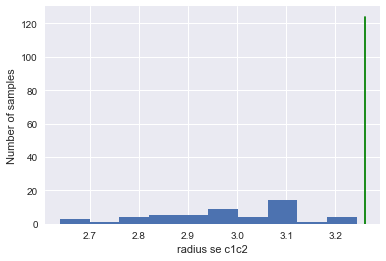

In [43]:
mean_rse2 = statistics.mean(rse2) #Mean of sampling distribution 
sd_rse2 = statistics.stdev(rse2)#Standard error in the mean/sd of sampling distribution
upper_boundary_rse2 = mean_rse2 + (1.96*sd_rse2)
lower_boundary_rse2 = mean_rse2 - (1.96*sd_rse2)
_=plt.hist(rse2, bins = 10)
_=plt.xlabel("radius se c1c2")
_=plt.ylabel("Number of samples")
print("Upper boundary",upper_boundary_rse2)
#print("Lower boundary",lower_boundary_rse2)
x_upper = [upper_boundary_rse2]*125
#x_lower = [lower_boundary_rse2]*125
y = list(range(0, 125))
plt.plot(x_upper,y, '-g')
#plt.plot(x_lower,y, '-g')
plt.show()

Upper boundary 9.773711718851798


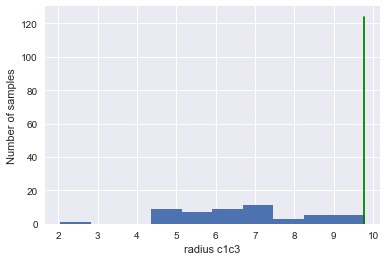

In [44]:
mean_r3 = statistics.mean(r3) #Mean of sampling distribution 
sd_r3 = statistics.stdev(r3)#Standard error in the mean/sd of sampling distribution
upper_boundary_r3 = mean_r3 + (1.96*sd_r3)
#lower_boundary_r3 = mean_r3 - (1.96*sd_r3)
_=plt.hist(r3, bins = 10)
_=plt.xlabel("radius c1c3")
_=plt.ylabel("Number of samples")
print("Upper boundary",upper_boundary_r3)
#print("Lower boundary",lower_boundary_r2)
x_upper = [upper_boundary_r3]*125
#x_lower = [lower_boundary_r3]*125
y = list(range(0, 125))
plt.plot(x_upper,y, '-g')
#plt.plot(x_lower,y, '-g')
plt.show()

Upper boundary 1.6841971105419833


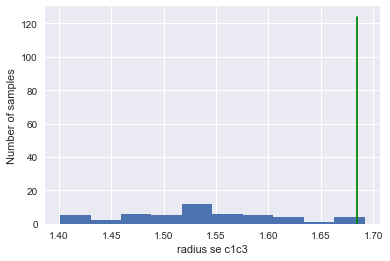

In [45]:
mean_rse3 = statistics.mean(rse3) #Mean of sampling distribution 
sd_rse3 = statistics.stdev(rse3)#Standard error in the mean/sd of sampling distribution
upper_boundary_rse3 = mean_rse3 + (1.96*sd_rse3)
lower_boundary_rse3 = mean_rse3 - (1.96*sd_rse3)
_=plt.hist(rse3, bins = 10)
_=plt.xlabel("radius se c1c3")
_=plt.ylabel("Number of samples")
print("Upper boundary",upper_boundary_rse3)
#print("Lower boundary",lower_boundary_rse2)
x_upper = [upper_boundary_rse3]*125
#x_lower = [lower_boundary_rse2]*125
y = list(range(0, 125))
plt.plot(x_upper,y, '-g')
#plt.plot(x_lower,y, '-g')
plt.show()

In [46]:
mean_upper_boundary = (upper_boundary_rse2 + upper_boundary_rse3)/2
print("Mean upper boundary: ", mean_upper_boundary)

Mean upper boundary:  2.4720223120904734


In [47]:
#Vizualizing something inside the boundary
x_in, y_in, z_in = getPoints("p2_inBoundary.csv");
fig = ipv.figure()
ipv.style.use('dark')
scatter = ipv.scatter(x_in,y_in,z_in, marker = 'sphere', color = 'blue', size = 5)
ipv.show()

In [48]:
#Vizualizing something inside the boundary
x_out, y_out, z_out = getPoints("p2_outOfBoundary.csv");
fig = ipv.figure()
ipv.style.use('dark')
scatter = ipv.scatter(x_out,y_out,z_out, marker = 'sphere', color = 'blue', size = 5)
ipv.show()